### 2020,2021,2022 어린이 보호구역 설치에 따른 어린이 교통사고 변화량

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [204]:
# 데이터 불러오기
accident_1317 = pd.read_excel('./TAAS_2017년_최근5년_교통사고현황.xlsx', header=2)
accident_1317.head(10)

,구분,유형,2013년,2014년,2015년,2016년,2017년
0,전체사고,사고건수,39439,40792,41665,40039,38625
1,NaN,사망자,378,400,376,348,343
2,NaN,부상자,56761,57345,58656,55669,53810
3,사망사고,사고건수,372,386,371,342,335
4,NaN,사망자,378,400,376,348,343
5,NaN,부상자,220,174,215,129,118
6,어린이사고,사고건수,1562,1710,1619,1515,1466
7,NaN,사망자,4,2,6,6,1
8,NaN,부상자,1805,2021,1865,1812,1745
9,노인사고,사고건수,4492,5009,5388,5219,5357


In [205]:
# 데이터 불러오기2
accident_1822 = pd.read_excel('./TAAS_2022년_최근5년_교통사고현황.xlsx', header=2)
accident_1822 = accident_1822.rename(columns={'구분':'구분1','유형':'유형1'})
accident_1822.head(10)

,구분1,유형1,2018년,2019년,2020년,2021년,2022년
0,전체사고,사고건수,38795,39258,35227,33913,33698
1,NaN,사망자,304,250,219,243,221
2,NaN,부상자,53751,53904,47513,45223,45329
3,사망사고,사고건수,300,250,218,238,215
4,NaN,사망자,304,250,219,243,221
5,NaN,부상자,121,89,70,71,86
6,어린이사고,사고건수,1331,1475,928,1026,1164
7,NaN,사망자,2,3,2,2,3
8,NaN,부상자,1588,1770,1078,1243,1365
9,노인사고,사고건수,5761,5912,5056,4829,5251


In [218]:
# 필요한 행만 뽑아서 새로운 데이터프레임 만들기
accident1822 = accident_1822.iloc[[0, 1, 2, 6, 7, 8]]
accident1317 = accident_1317.iloc[[0, 1, 2, 6, 7, 8]]

# '구분'과 '유형' 열을 기준으로 두 데이터프레임 합치기
accident = pd.concat([accident1317,accident1822], axis=1)
accident.drop('구분1', axis=1, inplace=True)
accident.drop('유형1', axis=1, inplace=True)
accident

,구분,유형,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,전체사고,사고건수,39439,40792,41665,40039,38625,38795,39258,35227,33913,33698
1,NaN,사망자,378,400,376,348,343,304,250,219,243,221
2,NaN,부상자,56761,57345,58656,55669,53810,53751,53904,47513,45223,45329
6,어린이사고,사고건수,1562,1710,1619,1515,1466,1331,1475,928,1026,1164
7,NaN,사망자,4,2,6,6,1,2,3,2,2,3
8,NaN,부상자,1805,2021,1865,1812,1745,1588,1770,1078,1243,1365


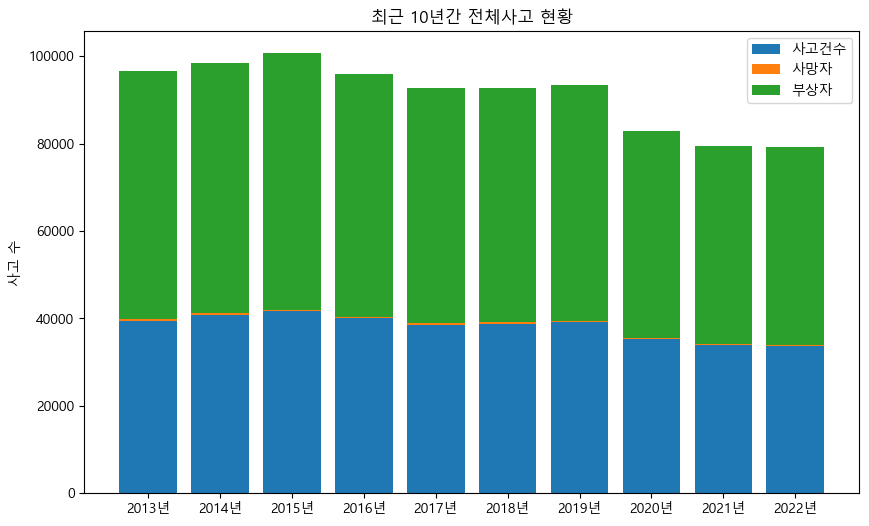

In [214]:
# < 전체사고 시각화 >
accident_count = accident.iloc[0, 2:]
death_count = accident.iloc[1, 2:]
injury_count = accident.iloc[2, 2:]

# x축 데이터 (년도)
years = accident.columns[2:]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, accident_count, label='사고건수')
plt.bar(years, death_count, label='사망자', bottom=accident_count)
plt.bar(years, injury_count, label='부상자', bottom=accident_count+death_count)

plt.ylabel('사고 수')
plt.title('최근 10년간 전체사고 현황')
plt.legend()

plt.show()

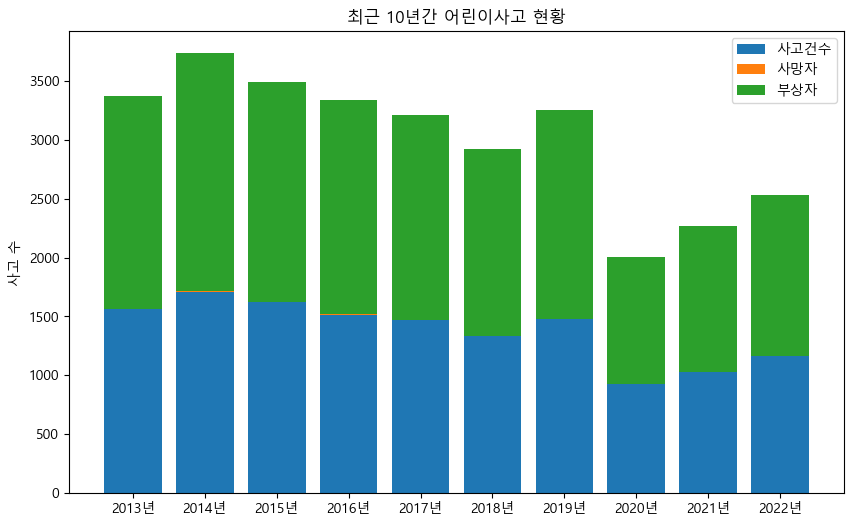

In [221]:
# < 어린이사고 시각화 >
accident_count2 = accident.iloc[3, 2:]
death_count2 = accident.iloc[4, 2:]
injury_count2 = accident.iloc[5, 2:]

# x축 데이터 (년도)
years = accident.columns[2:]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, accident_count2, label='사고건수')
plt.bar(years, death_count2, label='사망자', bottom=accident_count2)
plt.bar(years, injury_count2, label='부상자', bottom=accident_count2+death_count2)

plt.ylabel('사고 수')
plt.title('최근 10년간 어린이사고 현황')
plt.legend()

plt.show()

In [121]:
# 데이터 불러오기3
accident = pd.read_csv('./공공데이터_12세이하_교통사고.csv', header=1)
accident = accident.rename(columns={'자치구별(2)':'자치구별','연령별(2)':'연령별',
                            '사망자수':'2020 사망자수','부상자수':'2020 부상자수',
                            '사망자수.1':'2021 사망자수','부상자수.1':'2021 부상자수',
                            '사망자수.2':'2022 사망자수','부상자수.2':'2022 부상자수'})  # 열 이름 변경
accident.drop('자치구별(1)', axis=1, inplace=True)  # 필요없는 행 제거
accident.drop('연령별(1)', axis=1, inplace=True)  # 필요없는 행 제거
accident

,자치구별,연령별,2020 사망자수,2020 부상자수,2021 사망자수,2021 부상자수,2022 사망자수,2022 부상자수
0,소계,소계,219,47513,243,45223,221,45329
1,소계,12세이하,-,-,2,1243,3,1365
2,소계,13~20세,-,-,4,2013,7,1684
3,소계,14세 이하,2,1274,-,-,-,-
4,소계,15~20세,9,2124,-,-,-,-
...,...,...,...,...,...,...,...,...
333,강동구,51~60세,1,298,2,246,2,262
334,강동구,61-64세,-,123,-,74,1,144
335,강동구,65~70세,2,95,2,82,-,120
336,강동구,71세이상,1,108,2,108,1,116


In [122]:
matplotlib.rcParams['font.family'] = 'malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False     # 한글 폰트를 지정한 후 그래프에서 마이너스(-) 폰트가 깨지는 것을 막아줌

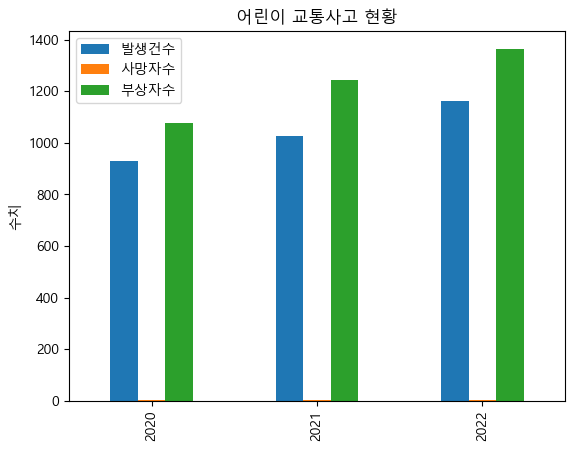

In [118]:
# 어린이 교통사고 데이터프레임
data = {
    '발생건수': [928, 1026, 1164],
    '사망자수': [2, 2, 3],
    '부상자수': [1078, 1243, 1365]
}
child = pd.DataFrame(data, index=['2020', '2021', '2022'])

# <어린이 교통사고 합계 시각화 >
child.plot(kind='bar')
plt.ylabel('수치')
plt.title('어린이 교통사고 현황')
plt.show()

In [124]:
# 데이터 불러오기 2
protected = pd.read_excel('./공공데이터_어린이보호구역지정현황_수정.xlsx')
protected.set_index('연번', inplace=True)
protected

,자치구명,행정동명,도로명주소,시설명,시설유형,지정연도
연번,,,,,,
1,종로구,가회동,북촌로4길7,서울재동초등학교,초등학교,2005
2,종로구,가회동,북촌로4길7,서울재동초등학교병설유치원,유치원,2005
3,종로구,교남동,송월1길61,상록수어린이집,어린이집,2008
4,종로구,무악동,통일로12길23,서울독립문초등학교,초등학교,2005
5,종로구,부암동,홍지문2길1,상명대학교사범대학부속초등학교,초등학교,2006
...,...,...,...,...,...,...
1688,강동구,천호2동,천중로12길23-40,곡교어린이집,어린이집,2010
1689,강동구,천호2동,올림픽로79길46,구립 다온어린이집,어린이집,2020
1690,강동구,천호3동,구천면로236-1,천호유치원,유치원,1997


In [125]:
# 데이터 정보 확인
protected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, 1 to 1692
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구명    1692 non-null   object
 1   행정동명    1692 non-null   object
 2   도로명주소   1692 non-null   object
 3   시설명     1692 non-null   object
 4   시설유형    1692 non-null   object
 5   지정연도    1692 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 92.5+ KB


In [164]:
# 최근 10년동안의 어린이 보호구역 현황 데이터프레임
protected_2013 = protected[protected['지정연도'] <= 2013]
protected_2014 = protected[protected['지정연도'] <= 2014]  # 13년에 비해 18개 증가
protected_2015 = protected[protected['지정연도'] <= 2015]  # 14년에 비해 30개 증가
protected_2016 = protected[protected['지정연도'] <= 2016]  # 15년에 비해 31개 증가
protected_2017 = protected[protected['지정연도'] <= 2017]  # 16년에 비해 18개 증가
protected_2018 = protected[protected['지정연도'] <= 2018]  # 17년에 비해 27개 증가
protected_2019 = protected[protected['지정연도'] <= 2019]  # 18년에 비해 41개 증가
protected_2020 = protected[protected['지정연도'] <= 2020]  # 19년에 비해 72개 증가
protected_2021 = protected[protected['지정연도'] <= 2021]  # 20년에 비해 39개 증가
protected_2022 = protected[protected['지정연도'] <= 2022]  # 21년에 비해 12개 증가

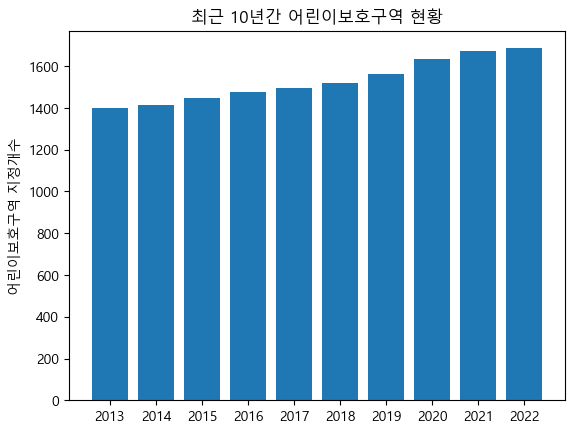

In [165]:
# < 최근 10년간 어린이 보호구역 현황 >
dataframes = [protected_2013, protected_2014, protected_2015, protected_2016, protected_2017, protected_2018, protected_2019, protected_2020, protected_2021, protected_2022]

# 각 데이터프레임의 길이를 계산하고 lengths 리스트에 추가
lengths = [len(df) for df in dataframes]

# x축 레이블
labels = ['2013','2014', '2015', '2016','2017', '2018', '2019','2020', '2021', '2022']

# 막대그래프 그리기
plt.bar(labels, lengths)
plt.ylabel('어린이보호구역 지정개수')
plt.title('최근 10년간 어린이보호구역 현황')
plt.show()